In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
import json
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from matplotlib import cm
import corner

In [8]:

from agnfinder.tf_sampling.hmc import hmc

In [9]:
tf.enable_eager_execution()

In [10]:
os.chdir('/home/mike/repos/agnfinder')

In [11]:
import tensorflow_probability as tfp
tfd = tfp.distributions

In [12]:


# problem = SamplingProblem(true_obs, true_params, forward_model)

# sampler = SamplerHMC(problem, n_burnin, n_samples, n_chains, init='random')

In [13]:
# dist = tfd.MultivariateNormalDiag(
#       loc=[.3, .7],
#       scale_diag=[0.3, 0.3])
# dist.mean().numpy()

dist = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(
        probs=[0.3, 0.7]),
    components_distribution=tfd.MultivariateNormalDiag(
    loc=[[.8, .5], [.2, .5]],
    scale_diag=[[.2, .4], [.2, .4]])
)

dist.mean()


Instructions for updating:
The `logits` property will return `None` when the distribution is parameterized with `logits=None`. Use `logits_parameter()` instead.


<tf.Tensor: id=50, shape=(2,), dtype=float32, numpy=array([0.38, 0.5 ], dtype=float32)>

In [14]:
x = tf.constant(np.random.rand(10, 2), dtype=tf.float32)
print(x.shape)
dist.prob(x).numpy()

(10, 2)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


array([0.5410461 , 0.65773624, 0.73294467, 0.5751166 , 0.50696504,
       0.42685348, 0.5521467 , 0.34028518, 0.62185323, 0.7601573 ],
      dtype=float32)

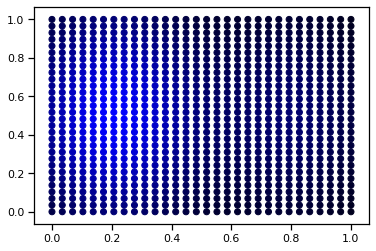

In [15]:
x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)
xx, yy = np.meshgrid(x, y)

xxx = xx.flatten()
yyy = yy.flatten()

locs = np.array([[xxx[n], yyy[n]] for n in range(len(xxx))])

probs = dist.prob(locs)
scaled = probs.numpy() / probs.numpy().max()

colors = [[0, 0, p] for p in scaled]

plt.scatter(x=locs[:, 0], y=locs[:, 1], c=colors)

In [16]:
# dist = tfd.Normal(loc=[0.3], scale=[3])

log_prob = dist.log_prob
 
# x = np.linspace(-5, 5)
# plt.plot(x, dist.prob(x).numpy())

In [17]:
n_chains = 3
# initial_state = tf.constant([0.1, 0.15, 0.2])
initial_state = tf.constant([np.random.rand(n_chains, 2)], dtype=tf.float32)
num_results = 500
num_burnin = 500
initial_state.shape

TensorShape([Dimension(1), Dimension(3), Dimension(2)])

In [18]:
log_prob(initial_state).numpy()

array([[-0.66514504, -0.2535348 , -0.8656235 ]], dtype=float32)

In [ ]:
samples, is_accepted = hmc(log_prob, initial_state, num_results, num_burnin)
samples = samples.numpy()
is_accepted = is_accepted.numpy()

In [ ]:
is_accepted.mean()

In [ ]:
samples.shape

In [ ]:
reshaped = samples.squeeze().reshape(-1, 2)
reshaped.shape

In [ ]:

_ = corner.corner(reshaped)

In [ ]:
for n in range(len(initial_state)):
    plt.hist(samples[:, n], alpha=0.4, density=True)
x = np.linspace(-9, 9)
plt.plot(x, dist.prob(x).numpy())